In [ ]:
!pip install simplekml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65860 sha256=9349daf979fce8c85ad8197dbf6b840ce333792d18b9fc593d51394833251bb7
  Stored in directory: /root/.cache/pip/wheels/16/7c/e6/621a95f24bd1ff987368f1c37881ffe013433ff6b413d87fcb
Successfully built simplekml


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import simplekml
import math
import copy

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import ConvexHull

In [ ]:
df = pd.read_csv("/content/NY-House-Dataset.csv")

df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
lat_long = df[['LATITUDE', 'LONGITUDE']]
lat, longg = df["LATITUDE"], df["LONGITUDE"]

X = lat_long.to_numpy()

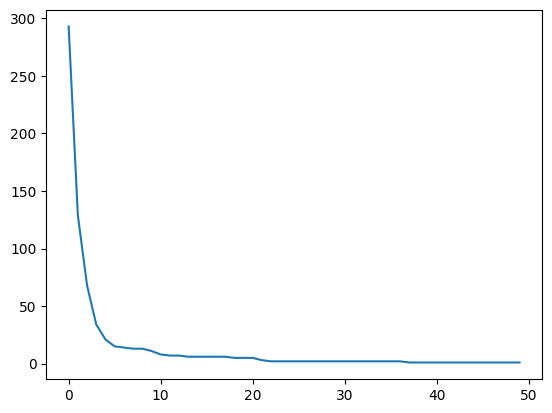

In [ ]:

s = 0
clusters = []
for x in range(0, 50):
  db = DBSCAN(eps = 0.005+s, min_samples = 1).fit(X)
  labels2 = db.labels_
  clusters.append(len(np.unique(labels2)))
  s += 0.001

plt.plot(np.arange(0, 50), np.array(clusters))

In [ ]:
db = DBSCAN(eps = 0.005, min_samples = 1).fit(X)
df['cluster'] = db.labels_
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,cluster
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,0
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,0
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,1
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,0
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,0


In [ ]:
df['cluster'].value_counts().to_frame()

,count
cluster,
0,1254
8,517
2,250
17,237
11,138
...,...
210,1
209,1
208,1


In [ ]:
kml = simplekml.Kml()
for cluster in range(len(np.unique(df["cluster"]))):
  clusters = []
  prices = []
  total = 0
  final = []
  points = []

  for x in range(len(df)):
    if (df["cluster"][x] == np.unique(df["cluster"])[cluster]):
      clusters.append({"price": df["PRICE"][x], "lat long": (df["LONGITUDE"][x], df["LATITUDE"][x]), "color" : "black", "address" : df["MAIN_ADDRESS"][x], "beds": df["BEDS"][x], "bath" : df["BATH"][x], "prop": df["PROPERTYSQFT"][x], "type" : df["TYPE"][x]})
      total = total + df["PRICE"]
      prices.append(df["PRICE"][x])

  if (len(clusters) > 1):
    prices.sort()
    mean = total/len(clusters)
    q1 = int(len(clusters)/4)
    q3 = int((len(clusters)*3)/4)

    for point in clusters:
      if ((point["price"] <= prices[q3 - 1]) & (point["price"] >= prices[q1 - 1])):
        point["color"] = simplekml.Color.green
      elif(point["price"] > prices[q3 - 1]):
        point["color"] = simplekml.Color.red
      else:
        point["color"] = simplekml.Color.blue
      final.append(point)
      points.append(point["lat long"])

  for point in final:
    pointf = kml.newpoint(name = "", coords = [point["lat long"]])
    pointf.style.iconstyle.color = point["color"]
    pointf.description = "description:   address: " + str(point["address"]) + ", price: " + str(point["price"]) + ", property square feet: " + str(point["prop"]) + ", bedrooms: " + str(point["beds"]) + ", bathrooms: " + str(point["bath"]) + ", type:" + str(point["type"])

kml.save("polygon_with_colored_points.kml")

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])